# Projet 4 - Anticipez les besoins en consommation de bâtiments

# la problématique
Nous nous intéressons aux émissions des bâtiments non destinés à l'habitation dans la ville de Seattle. Le but de ce projet est de :
* Ville neutre en émissions de carbone en 2050
* Prédire les émissions de CO2
* Prédire la consommation totale d'énergie
* Evaluer l'intérêt de l'ENERGY STAR Score pour la prédiction d'émissions

La prédiction se basera sur les données structurelles des bâtiments :
- Taille et usage des bâtiments
- Date de construction
- Situation géographique
- ...

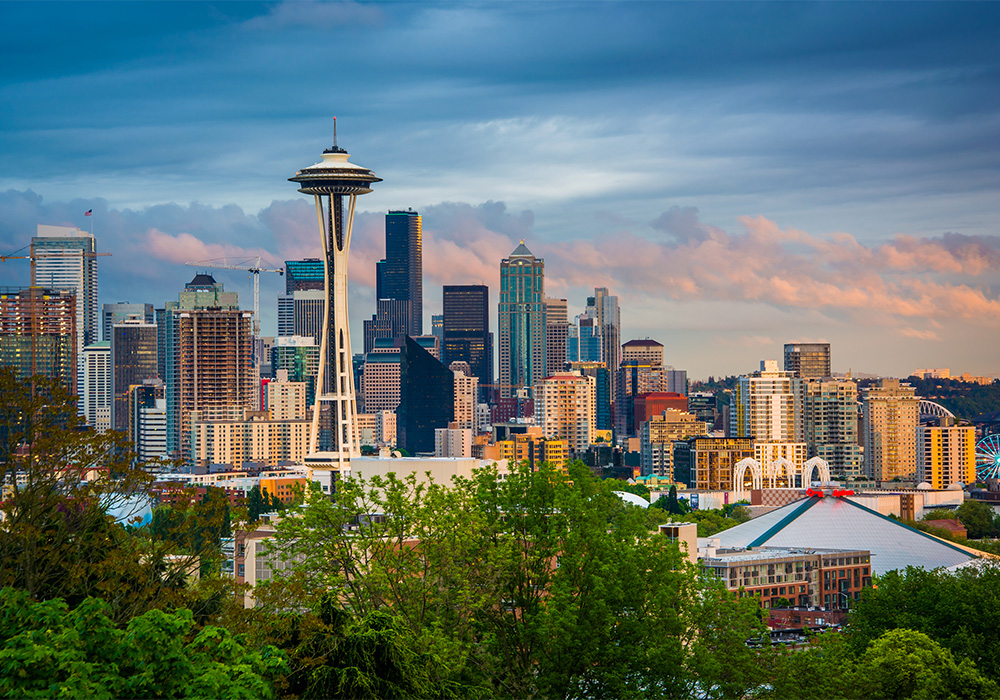

In [1]:
from IPython.display import Image
Image('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/4-Projet 4/1-Code/Seattle.jpg')

# **Partie 1 : Connaissance des données**

# 1. Importations des librairies

In [2]:
#------------------------------------------
# projet 4: Anticipez les besoins en consommation de bâtiments
# Auteur : Mohamed MERAH
# Date: Novembre 2023
# OpenClassrooms 2023-2024
#-------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
#import sklearn
import missingno
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# 2. Chargement des jeux de données

In [3]:
data_2016 = pd.read_csv('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/4-Projet 4/2-Ressources/2016_Building_Energy_Benchmarking.csv')

In [4]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
# Counts the number of columns per data type
data_2016.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

In [6]:
data_2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


# 3. Nombre de lignes

In [7]:
def Nb_lignes_Data(data) : 
    return print ("Nombre de lignes initiales :", data.shape[0],"lignes")

In [8]:
Nb_lignes_Data(data_2016) 

Nombre de lignes initiales : 3376 lignes


# 4. Nombre de colonnes

In [9]:
def Nb_Colonnes_Data(data) : 
    return print ("Nombre de colonnes initiales :", data.shape[1],"colonnes")

In [10]:
 Nb_Colonnes_Data(data_2016)

Nombre de colonnes initiales : 46 colonnes


# **Partie 2 : Qualité du jeu de données**

# 2.1 Nombre de données dupliquées

In [11]:
# Nombre de données dupliquées 
def Nb_Data_Dupliq(data) :
    return print("Nombre de données dupliquées :",data.duplicated().sum())

In [12]:
Nb_Data_Dupliq(data_2016) 

Nombre de données dupliquées : 0


# 2.2 Nombre de Colonnes dupliquées

In [13]:
def Nb_Colonnes_Meme_Nom (data) :
    return ("Nombre de Colonnes dupliquées :",data.columns.duplicated().sum())

In [14]:
Nb_Colonnes_Meme_Nom (data_2016)

('Nombre de Colonnes dupliquées :', 0)

# 2.3 Données manquantes

In [15]:
#Pourcentage des données manquantes
def Taux_Data_Manquantes (data) :
    return print('Taux des données manquantes est : ',round(data.isna().mean().mean()*100,2),'%')

In [16]:
Taux_Data_Manquantes (data_2016)

Taux des données manquantes est :  12.85 %


In [17]:
def Graph_Pie_NaN(data):

    Nb_lignes = data.shape[0] 
    Nb_colonnes = data.shape[1]

    # Nombre de données non manquante
    Nb_data = data.count().sum()

    # Nombre de données totale de ce jeu de données (colonnes*lignes)
    Nb_totale = (Nb_colonnes*Nb_lignes)

    #taux remplissage jeu de données
    rate_data = (Nb_data/Nb_totale)
    print("Le jeux de données est rempli à {:.2%}".format(rate_data))
    print("et il a {:.2%} de données manquantes".format(1-rate_data))
    print(" ")
    print(" ")

    # Pie Plot
    rates = [rate_data, 1 - rate_data]
    labels = ["Données", "NaN"]

    explode =(0,0.1) 
    colors = ['gold', 'pink']
    # Plot
    plt.figure(figsize=(12,15))
    plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', shadow=True, textprops={'fontsize': 20})

    ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 20)
    ttl.set_position([0.5, 0.85])

    plt.axis('equal')
    #ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout() 

    plt.show()

Le jeux de données est rempli à 87.15%
et il a 12.85% de données manquantes
 
 


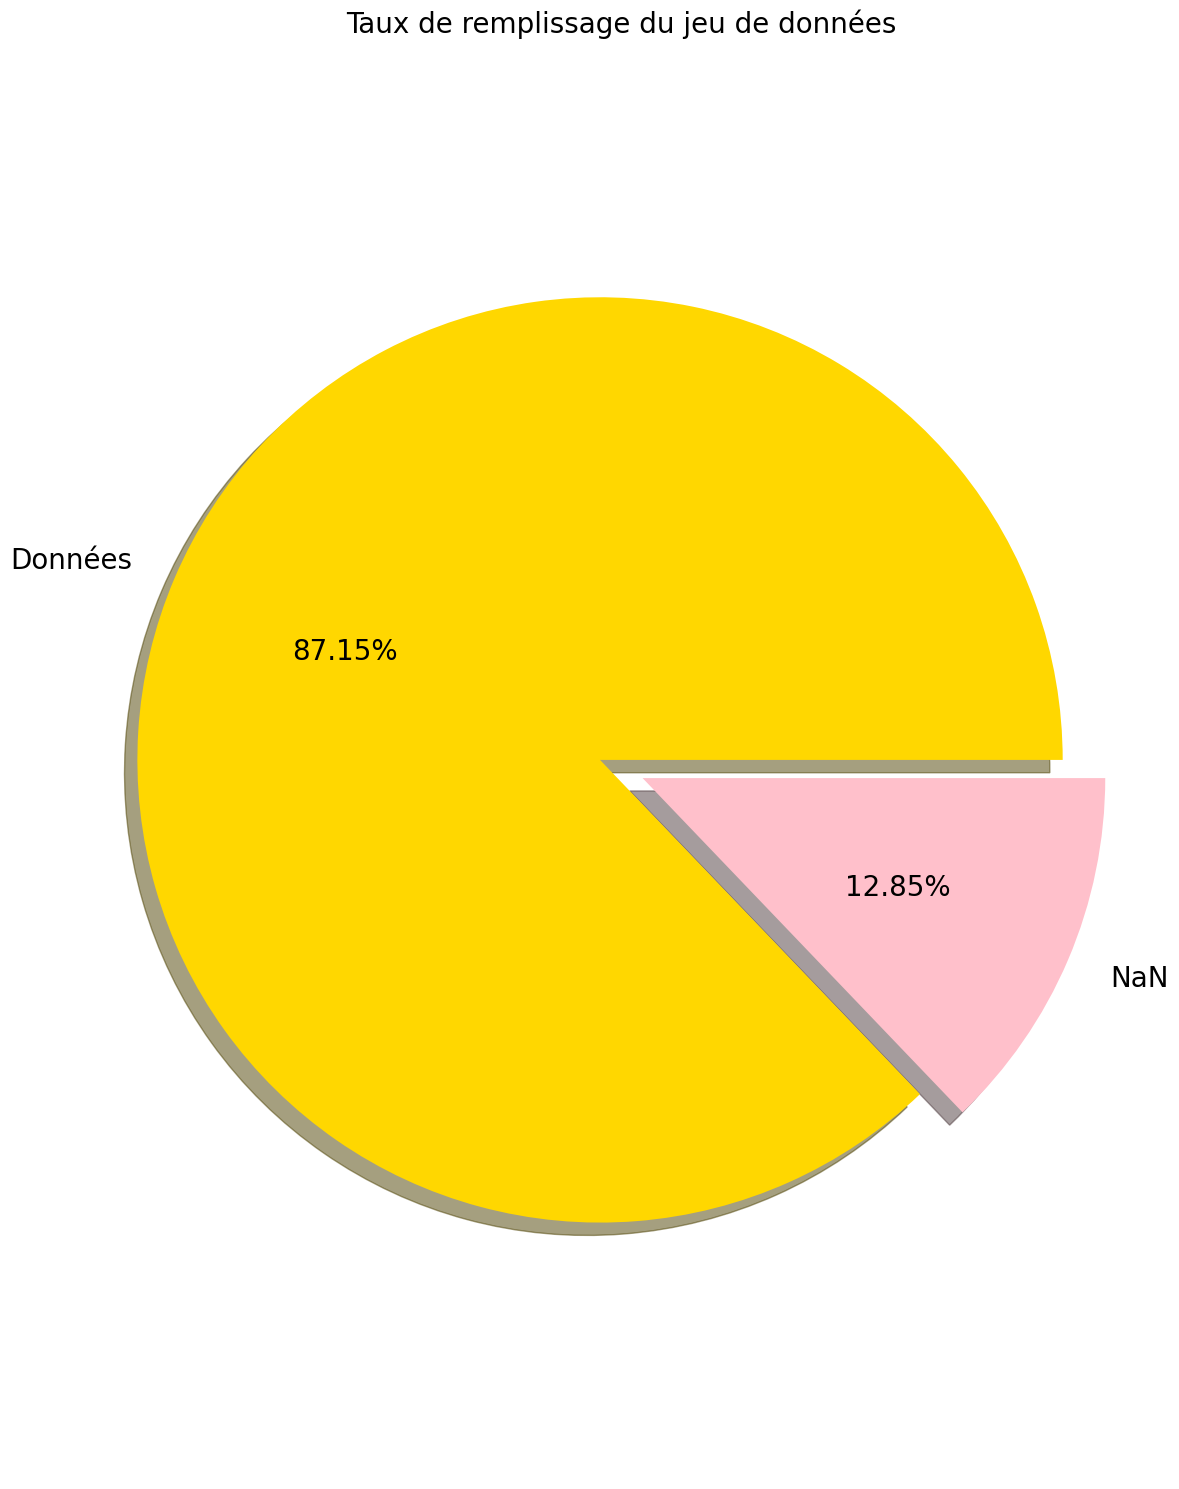

In [18]:
Graph_Pie_NaN(data_2016)

[]

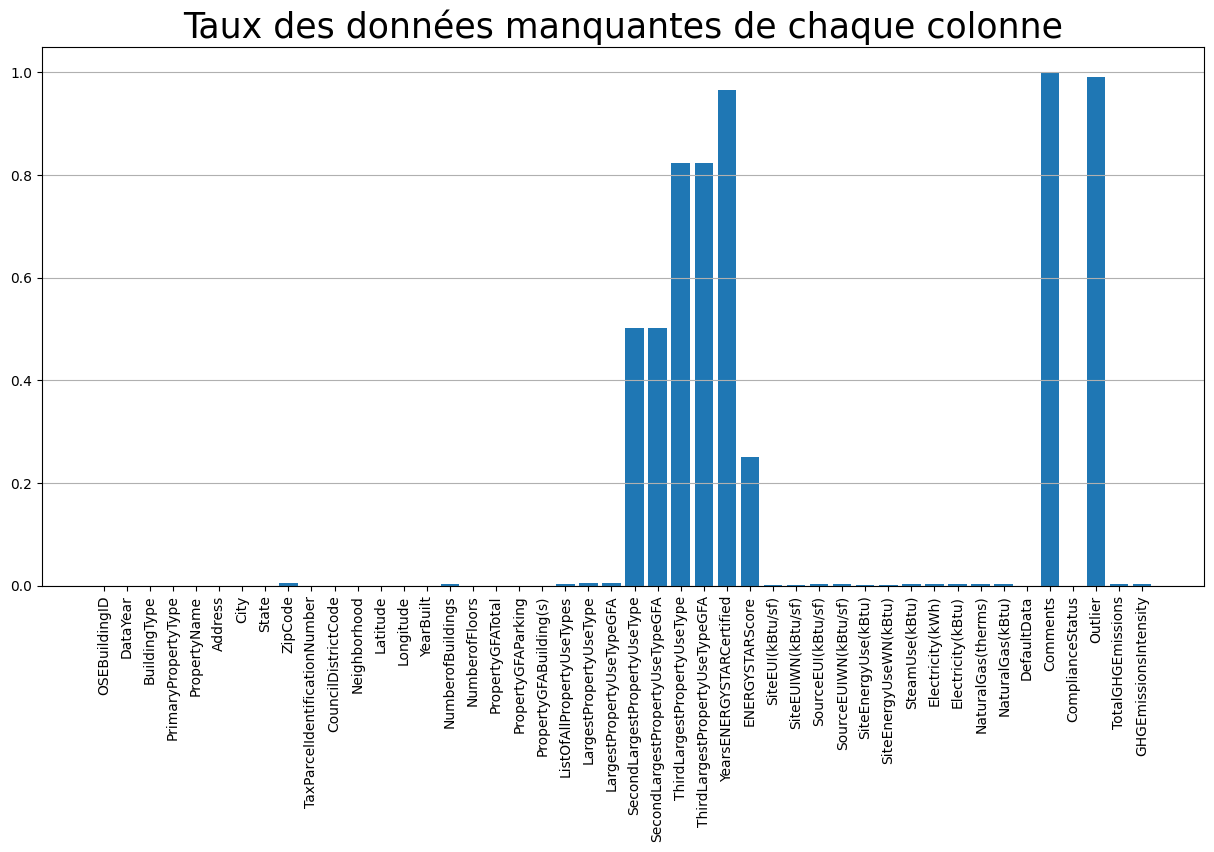

In [19]:
#Taux des données manquantes 
plt.figure(figsize=[15,7])
plt.title('Taux des données manquantes de chaque colonne',fontsize=25)
plt.bar(height=data_2016.isna().mean(),x=data_2016.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

In [20]:
# Taux de données manquantes de chaque colonnes
def Taux_Data_Manquantes_Col(data) :
    print("Taux de données manquantes de chaque colonne est :")
    Taux_Data_Manquantes_Colonnes=(data.isna().mean().sort_values(ascending=False)*100)
    print(round(Taux_Data_Manquantes_Colonnes),'%')

In [21]:
Taux_Data_Manquantes_Col(data_2016)

Taux de données manquantes de chaque colonne est :
Comments                           100.0
Outlier                             99.0
YearsENERGYSTARCertified            96.0
ThirdLargestPropertyUseType         82.0
ThirdLargestPropertyUseTypeGFA      82.0
SecondLargestPropertyUseType        50.0
SecondLargestPropertyUseTypeGFA     50.0
ENERGYSTARScore                     25.0
LargestPropertyUseTypeGFA            1.0
LargestPropertyUseType               1.0
ZipCode                              0.0
ListOfAllPropertyUseTypes            0.0
SourceEUIWN(kBtu/sf)                 0.0
SourceEUI(kBtu/sf)                   0.0
Electricity(kWh)                     0.0
Electricity(kBtu)                    0.0
NaturalGas(therms)                   0.0
NaturalGas(kBtu)                     0.0
TotalGHGEmissions                    0.0
SteamUse(kBtu)                       0.0
GHGEmissionsIntensity                0.0
NumberofBuildings                    0.0
SiteEUI(kBtu/sf)                     0.0
SiteEU

# 2.4 Identification des colonnes vides

In [22]:
#Nombre de colonnes vides
def Nb_Colonnes_Vides(data) :
    print("Nombre de colonnes vides :",data.isna().all(axis=0).sum())

In [23]:
Nb_Colonnes_Vides(data_2016)

Nombre de colonnes vides : 1


# 2.5  Identification des lignes vides

In [24]:
# Nombre de lignes entierement vide
def Nb_Lignes_Vides (data) :
    return data.isna().all(axis=1).sum()

In [25]:
 Nb_Lignes_Vides (data_2016)

0

# 2.6 Identification des variables qualitatives & quantitatives

In [26]:
# Types de variables
data_2016.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

In [27]:
cat_data =[]
num_data=[]

for i,n in enumerate (data_2016.dtypes):
  if n==object :
     cat_data.append(data_2016.iloc[:,i])
  else :
     num_data.append(data_2016.iloc[:,i])

In [28]:
# Liste des variables qualitatives
cat_data=pd.DataFrame(cat_data).T
print( "nombre de variables qualitatives :",len(cat_data.columns))
cat_data.columns

nombre de variables qualitatives : 15


Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'ComplianceStatus', 'Outlier'],
      dtype='object')

 - **Localisation :** 'Address','City', 'State', 'Neighborhood'
 - **Identification :** 'PropertyName', 'TaxParcelIdentificationNumber'
 - **Usage et construction :**'BuildingType', 'PrimaryPropertyType','ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
 - **Infos liées aux données :** 'ComplianceStatus'

In [29]:
#Liste des variables quantitatives
num_data=pd.DataFrame(num_data).T
print ("Nombre de variable quantitatives :",len(num_data.columns))
num_data.columns

Nombre de variable quantitatives : 31


Index(['OSEBuildingID', 'DataYear', 'ZipCode', 'CouncilDistrictCode',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

 - **Localisation :**  'ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude',
 - **Identification :**  'OSEBuildingID',
 - **Usage et construction :** 'NumberofBuildings','NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','YearBuilt',
  
 - **Infos liées aux données :** 'DataYear', 'DefaultData',
 - **Relevés énergétiques et calcul des émissions :** 'ENERGYSTARScore','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)', 'Electricity(kWh)',
 'Electricity(kBtu)','NaturalGas(therms)', 'NaturalGas(kBtu)',  'TotalGHGEmissions', 
  'GHGEmissionsIntensity','SteamUse(kBtu)'

# **Partie 3 : Nettoyage des données**


- Suppression des données inexploitables
- Sélection des données pertinentes pour la mission
- Traitement des données


# 3.1 Nettoyage des données **"BuildingType"**

- Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType.

In [30]:
data_2016.shape

(3376, 46)

In [31]:
data_2016["BuildingType"].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

- Apres une recherche internet, SPS-District K-12 est Seattle public school District. c'est une école qui n'est donc pas destiné a l'habitation.
- Les habitation contenant 'Multifamily' et Campus sont donc a supprimer.

In [32]:
# On garde que les bâtiments non destinés à l'habitation
data_2016 = data_2016.loc[data_2016['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'Nonresidential WA','SPS-District K-12']),:]

In [33]:
data_2016.shape

(1644, 46)

# 3.2 Nettoyage des données  **"ComplianceStatus"** 

In [34]:
data_2016['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1524
Error - Correct Default Data      88
Non-Compliant                     18
Missing Data                      14
Name: count, dtype: int64

In [35]:
# On garde que les bâtiments avec des données conformes
data_2016 = data_2016.loc[data_2016['ComplianceStatus']=='Compliant',:]

In [36]:
data_2016.shape

(1524, 46)

# 3.3 Suppression des colonnes contenant uniquement des valeurs nulles

In [37]:
data_2016.dropna(axis=1, how="all", inplace=True)

In [38]:
data_2016.shape

(1524, 44)

# 3.4 Suppression des colonnes ayant plus de 40% valeur manquantes

In [39]:
def Taux_colonne_NaN(data, taux):
    NaN_Taux = (data.isna().mean().sort_values(ascending=False)*100).reset_index()
    NaN_Taux.columns = ['Variable','Taux_de_NaN']
    NaNs_rate = NaN_Taux[NaN_Taux.Taux_de_NaN >= taux]
    return NaNs_rate

In [40]:
Taux_NaN_Col = Taux_colonne_NaN(data_2016, 40)
Taux_NaN_Col

,Variable,Taux_de_NaN
0,YearsENERGYSTARCertified,93.635171
1,ThirdLargestPropertyUseType,77.624672
2,ThirdLargestPropertyUseTypeGFA,77.624672
3,SecondLargestPropertyUseTypeGFA,45.472441
4,SecondLargestPropertyUseType,45.472441


In [41]:
list(Taux_NaN_Col["Variable"])

['YearsENERGYSTARCertified',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType']

In [42]:
# Suppression des colonnes ayant un taux de données manquantes trop élevée (40% de données manquantes)
data_2016 = data_2016.drop(columns= list(Taux_NaN_Col["Variable"]))


In [43]:
# Suppression des variables qualitatives et quantitative non pertinentes
Quantitative_Coln=['Comments','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
num_data = num_data.drop(columns= Quantitative_Coln)

Qualitative_Coln=['YearsENERGYSTARCertified','ThirdLargestPropertyUseType','SecondLargestPropertyUseType']
cat_data = cat_data.drop(columns= Qualitative_Coln)

In [44]:
data_2016.shape

(1524, 39)

# 3.5 Identification graphique des outliers

In [45]:
num_data.describe() 

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376.000000,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,0.033472,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,0.179891,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,0.000000,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,0.000000,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,0.000000,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,0.000000,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,1.000000,16870.980000,34.090000


In [46]:
len(num_data.columns)

28

In [47]:
def boxplot_Outliers(data):
    n=0
    for i in data.columns :
        plt.figure(figsize=(11,1))
        sns.boxplot(num_data,x=data.columns[n])
        plt.title(data.columns[n])
        n+=1;
    return plt.show()

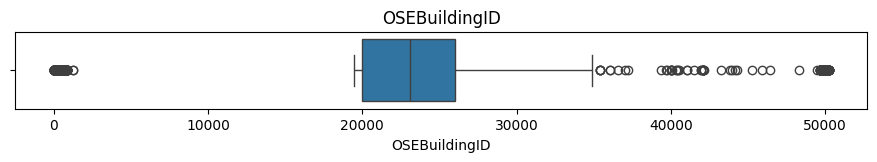

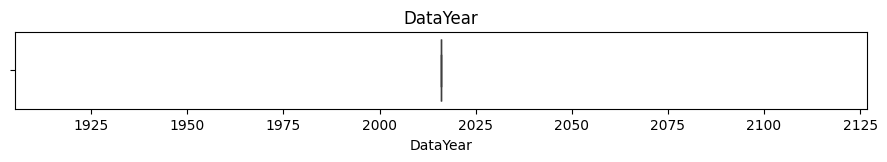

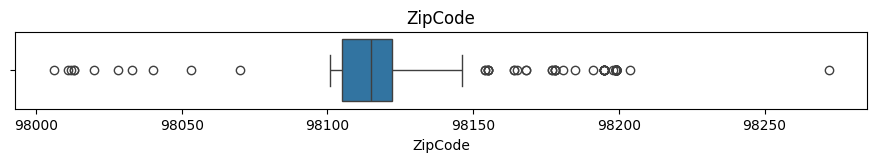

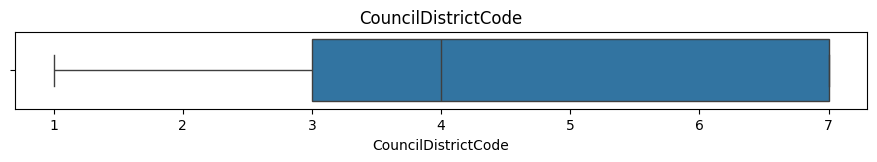

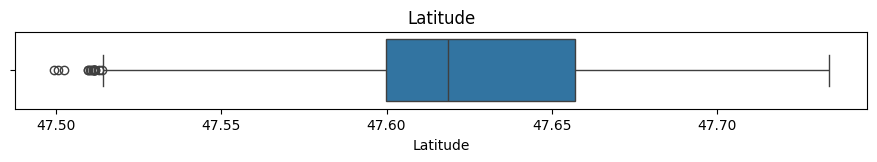

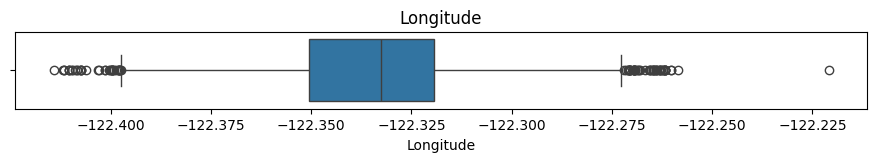

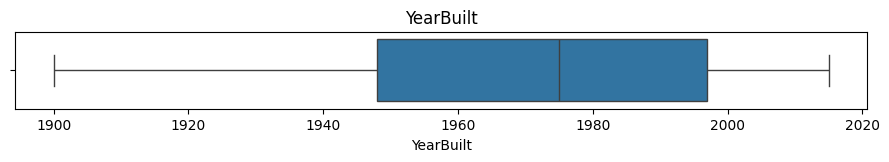

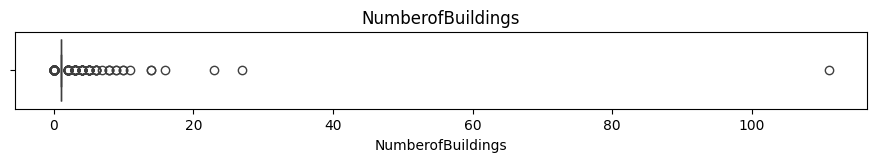

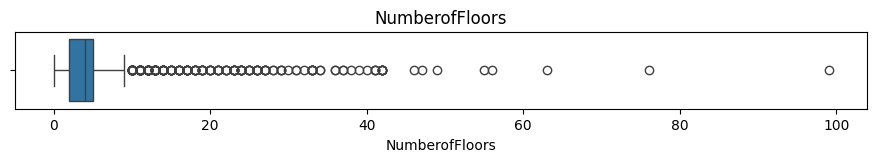

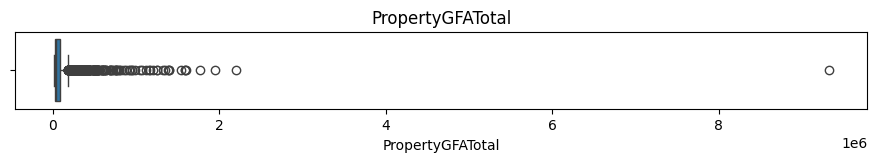

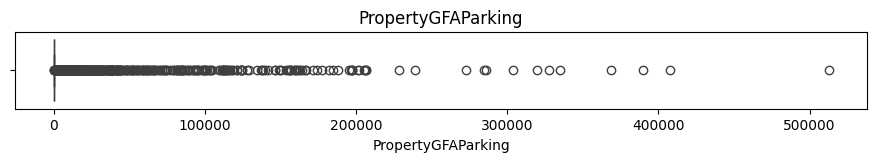

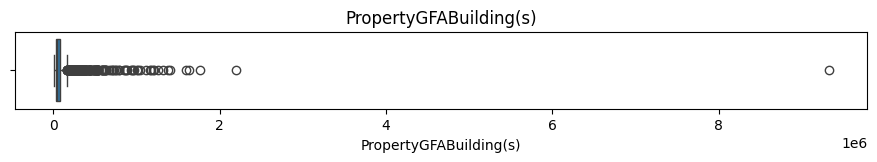

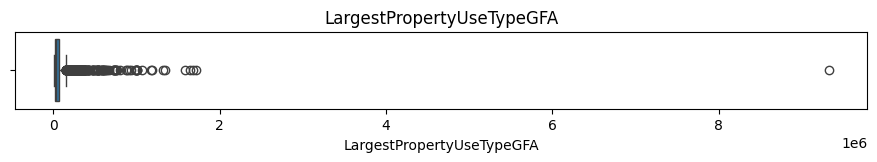

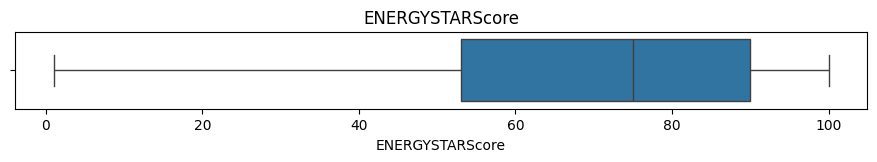

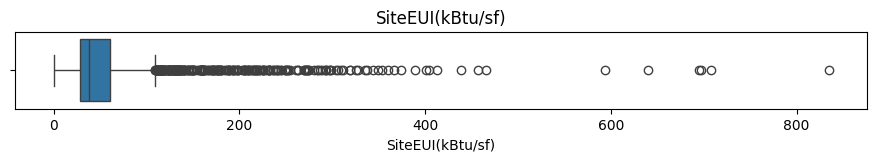

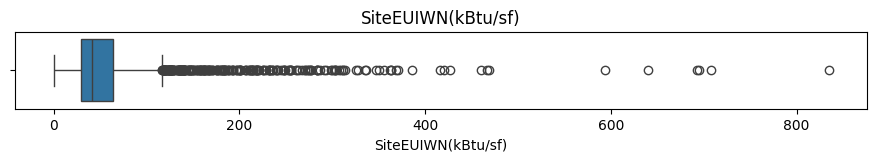

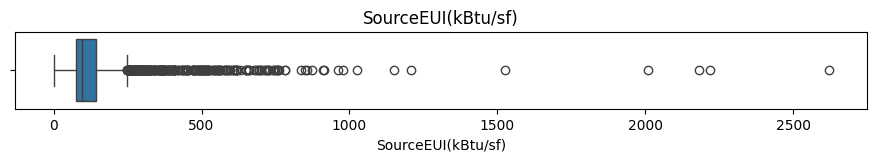

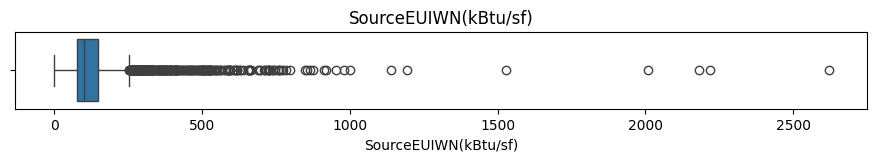

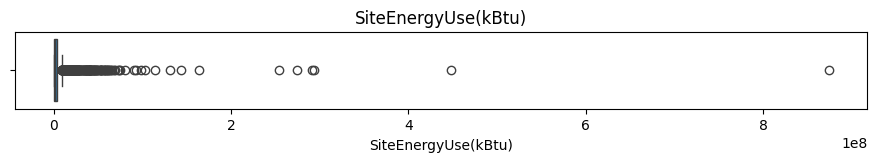

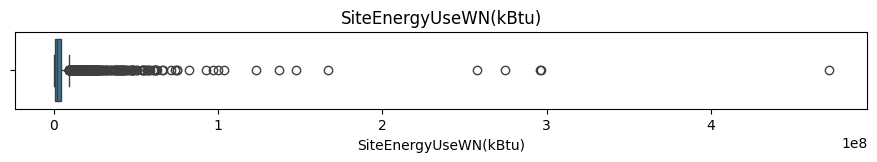

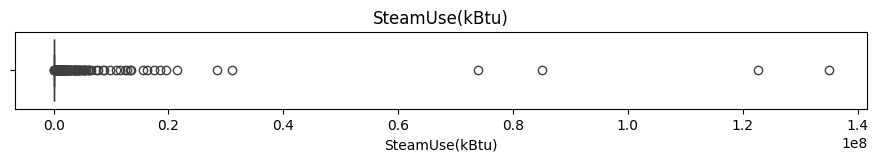

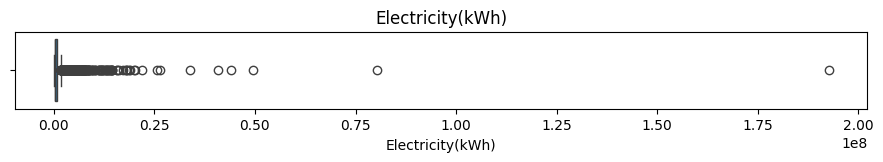

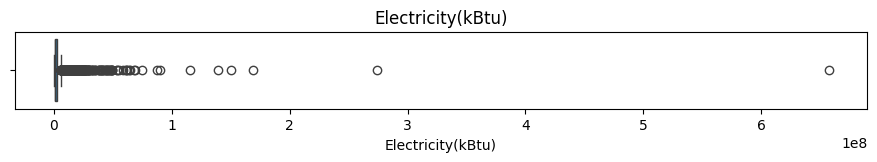

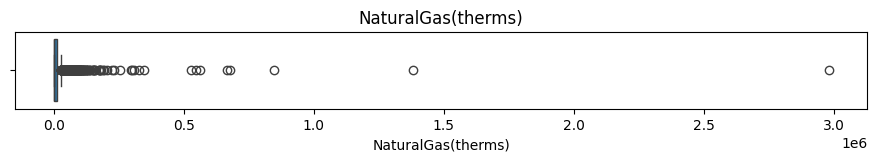

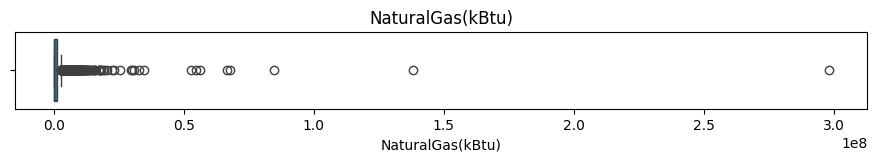

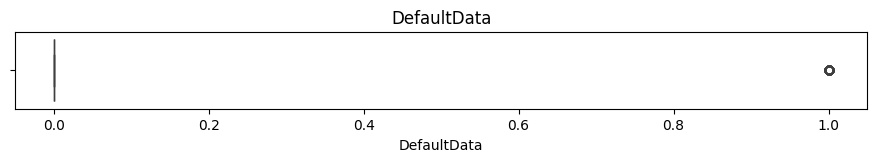

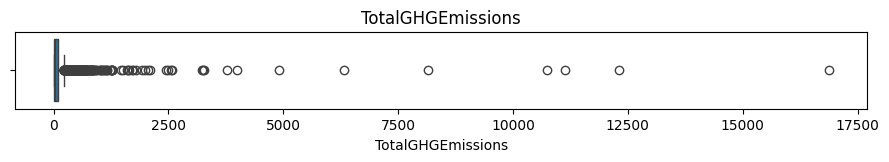

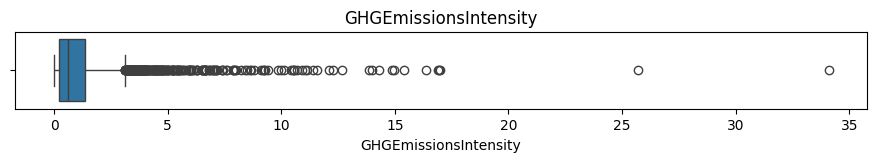

In [48]:
boxplot_Outliers(num_data)

# 3.6 Identification des outliers IQR

In [49]:
#Cette méthode me permet de relever les points de données qui tombe en dehors de 1,5 fois 
#d’une plage interquartile au-dessus du 3e quartile Q3 et en dessous du 1er quartile Q1

def Detection_Outliers_IQR(data,col) :
    Q1= data[col].quantile(0.25)
    Q3= data[col].quantile(0.75)
    IQR= Q3-Q1
    
    indexes_outliers5=[]
    Lower_Bound = Q1 - 1.5*IQR
    Upper_Bound = Q3 + 1.5*IQR
    
    Liste_outliers= data.index[ (data[col]< Lower_Bound) |  (data[col] > Upper_Bound)]
    return print ("Nombre des ouliers de la variable:",'"',col,'"',":",len (Liste_outliers),"outliers\n",Liste_outliers,
                  "\n=============================================================================================\n")

In [50]:
def Identification_Outliers_IQR(data):
    n=0
    for i in data.columns :
        outliers=Detection_Outliers_IQR(data,data.columns[n]) 
        n+=1
    return outliers

In [51]:
Identification_Outliers_IQR(num_data)

Nombre des ouliers de la variable: " OSEBuildingID " : 898 outliers
 Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375],
      dtype='int64', length=898) 

Nombre des ouliers de la variable: " DataYear " : 0 outliers
 Index([], dtype='int64') 

Nombre des ouliers de la variable: " ZipCode " : 114 outliers
 Index([  15,   32,   37,   78,  206,  229,  231,  239,  240,  302,
       ...
       3180, 3275, 3277, 3278, 3279, 3280, 3321, 3340, 3354, 3359],
      dtype='int64', length=114) 

Nombre des ouliers de la variable: " CouncilDistrictCode " : 0 outliers
 Index([], dtype='int64') 

Nombre des ouliers de la variable: " Latitude " : 16 outliers
 Index([  36,   62,  615,  617,  680,  682,  683,  684, 1119, 1907, 1981, 2312,
       2436, 3084, 3165, 3253],
      dtype='int64') 

Nombre des ouliers de la variable: " Longitude " : 92 outliers
 Index([  22,  106,  109,  132,  447,  670,  675,  676,  

# 3.7 Imputation par KNN

In [52]:
cat_data =[]
num_data=[]

for i,n in enumerate (data_2016.dtypes):
  if n==object :
     cat_data.append(data_2016.iloc[:,i])
  else :
     num_data.append(data_2016.iloc[:,i])

In [53]:
# Liste des variables qualitatives
cat_data=pd.DataFrame(cat_data).T
#Liste des variables quantitatives
num_data=pd.DataFrame(num_data).T

Text(0.5, 1.0, 'Nombre de données quantitatives sur chaque colonne')

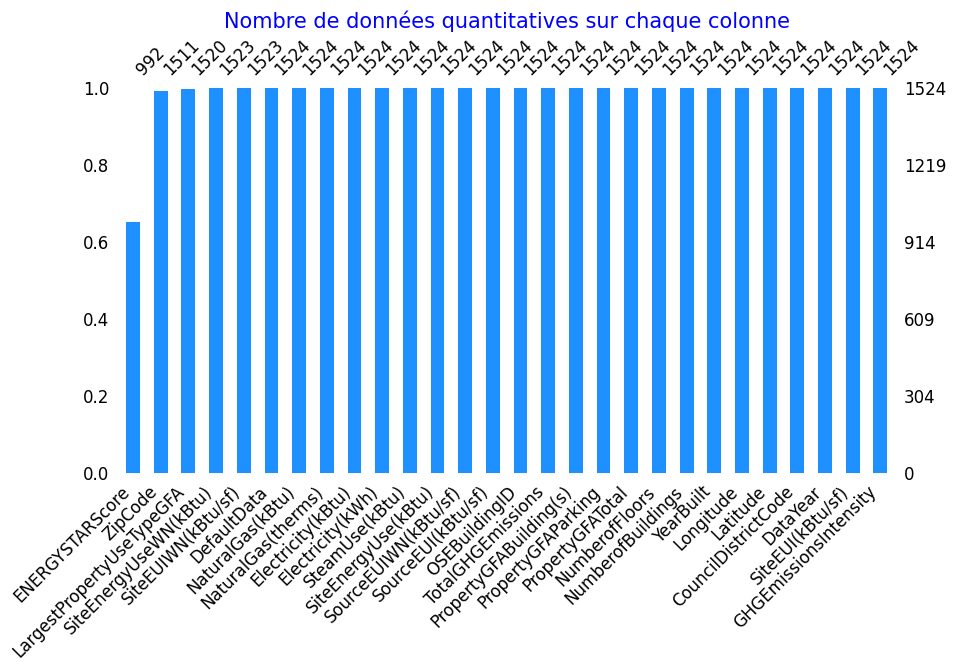

In [54]:
missingno.bar(num_data[num_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.title('Nombre de données quantitatives sur chaque colonne',color='blue',fontsize=15)

<Axes: >

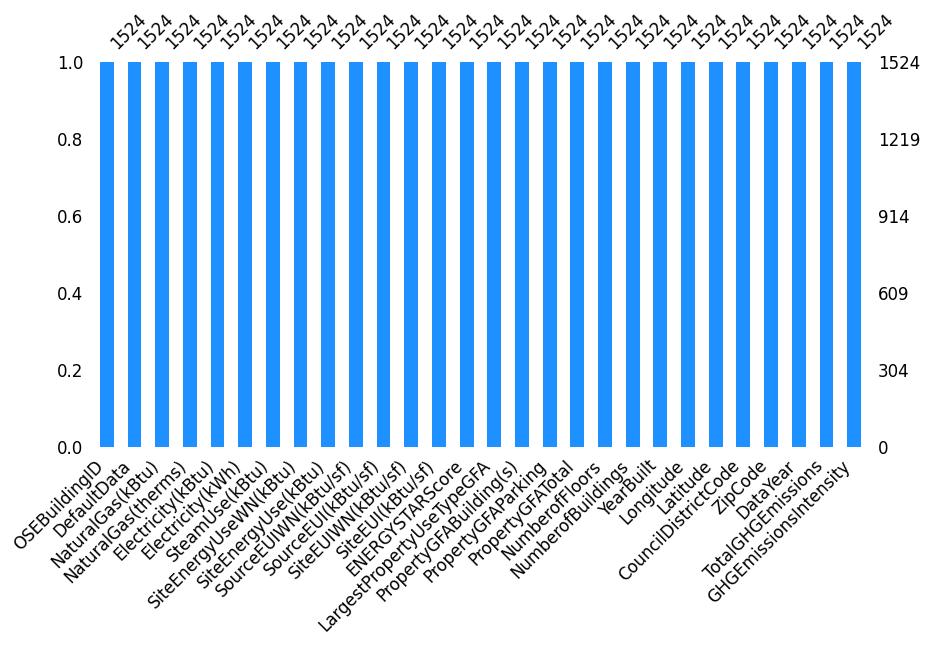

In [55]:
# Imputation
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_2016[num_data.columns]=imputer.fit_transform(data_2016[num_data.columns])
missingno.bar(data_2016[num_data.columns], color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

# **Partie 4 : Sauvegarde des données cleanées dans un nouveau CSV**

In [56]:
data_2016.to_csv("data_2016_cleaned.csv")

In [57]:
data_2016.shape

(1524, 39)

Le jeux de données est rempli à 99.99%
et il a 0.01% de données manquantes
 
 


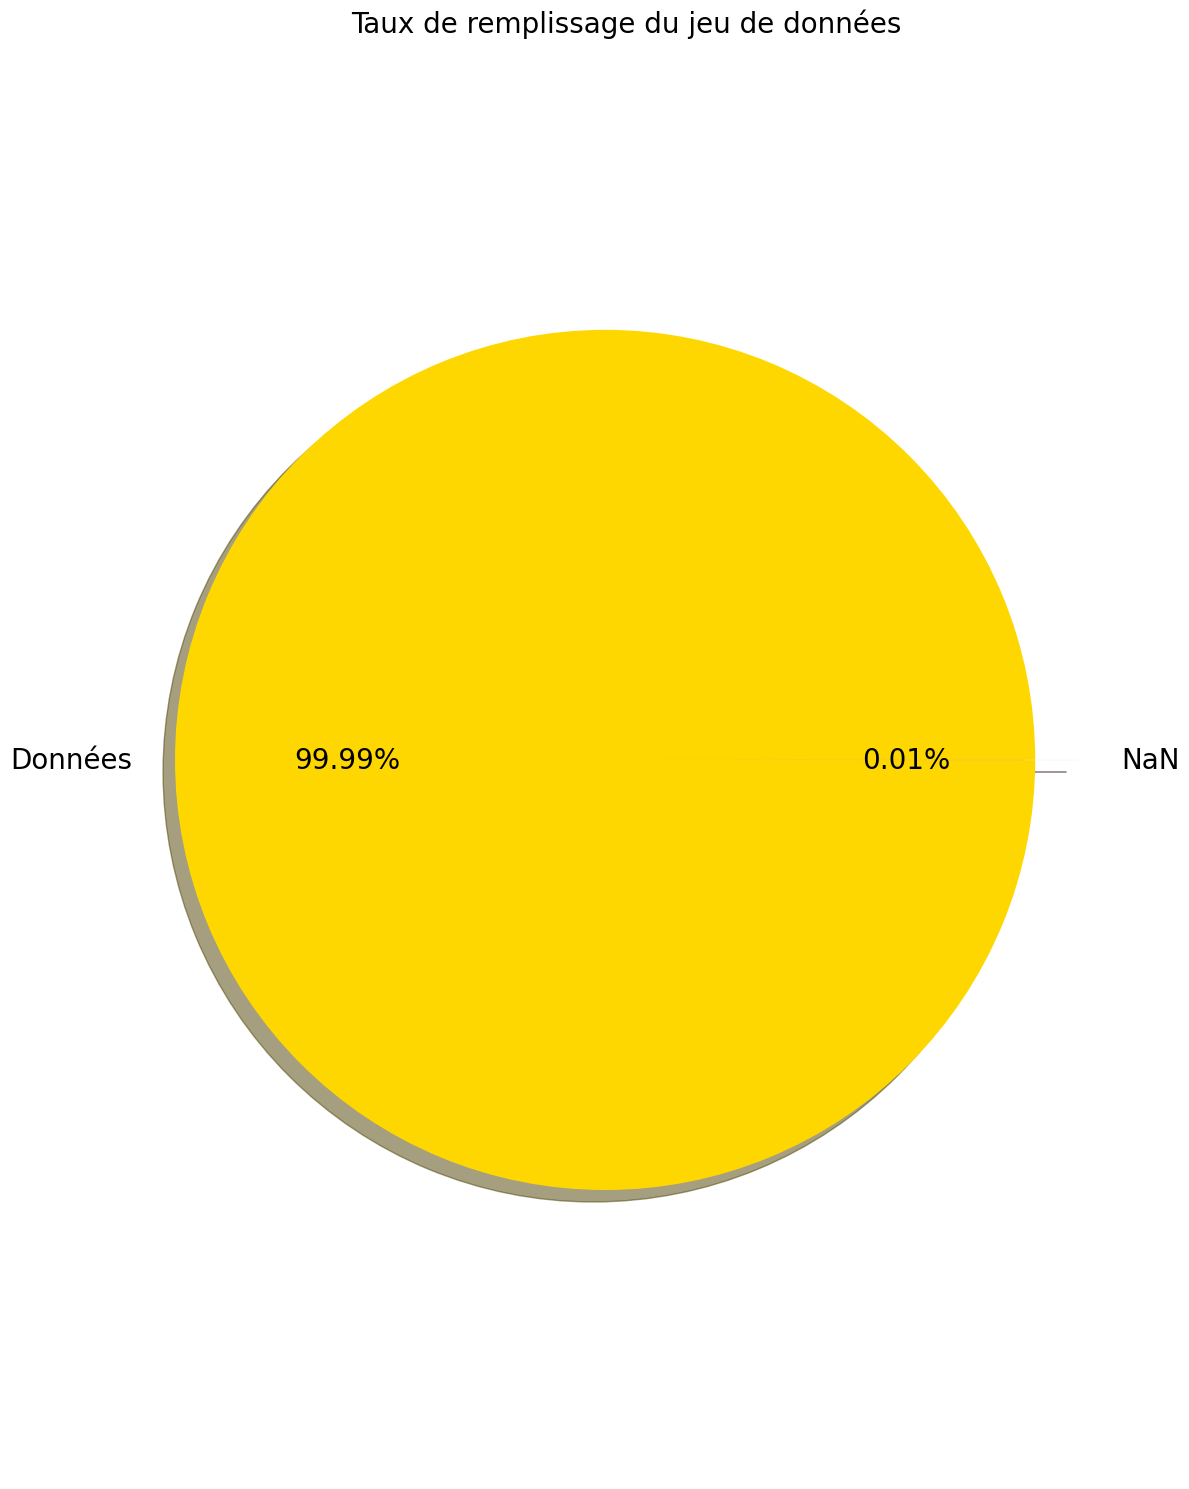

In [58]:
Graph_Pie_NaN(data_2016)

In [59]:
Taux_colonne_NaN(data_2016, 0)

,Variable,Taux_de_NaN
0,LargestPropertyUseType,0.262467
1,SiteEnergyUseWN(kBtu),0.000000
2,LargestPropertyUseTypeGFA,0.000000
3,ENERGYSTARScore,0.000000
4,SiteEUI(kBtu/sf),0.000000
5,SiteEUIWN(kBtu/sf),0.000000
6,SourceEUI(kBtu/sf),0.000000
7,SourceEUIWN(kBtu/sf),0.000000
8,SiteEnergyUse(kBtu),0.000000
9,OSEBuildingID,0.000000
